In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as sig
from scipy.io import wavfile

In [2]:
plt.rcParams["figure.figsize"] = [15, 8]
plt.rcParams['font.size'] = '13'

In [3]:
N = 1024
A = 5
f1 = 10
f2 = 20
fs = 1000
dt = 1/fs


In [4]:
t = np.arange(N)*dt
x1 = A * np.sin(2 * np.pi * f1 * t)
x2 = A * np.sin(2 * np.pi * f2 * t)
x = x1 + x2


In [5]:
widmo = 20 * np.log10(np.abs(np.fft.rfft(x))) / (N/2)
freq = np.fft.rfftfreq(N, d=dt)

In [6]:
# widmo = np.abs(np.fft.rfft(x)) / (N/2)
# freq = np.fft.rfftfreq(N, d=dt)

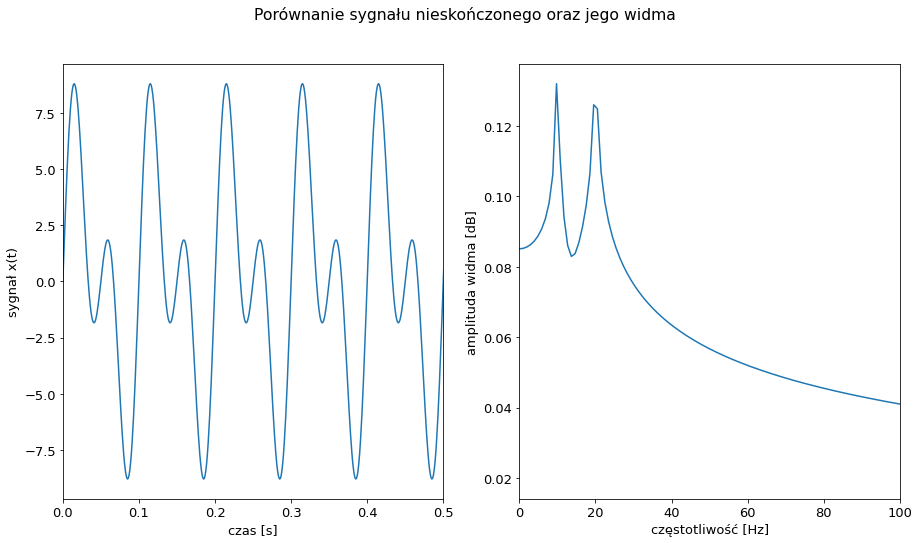

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Porównanie sygnału nieskończonego oraz jego widma ')
ax1.plot(t, x)
ax1.set(xlabel='czas [s]', ylabel='sygnał x(t)', xlim = (0,0.5))
ax2.plot(freq, widmo)
ax2.set(xlabel='częstotliwość [Hz]', ylabel='amplituda widma [dB]', xlim = (0,100))
plt.show()

In [8]:
boxsize = 200
shift = 300
window = sig.windows.boxcar(boxsize)
rect = np.concatenate((np.zeros(int(N/2 - shift) - int(window.size/2)), window))
rect = np.concatenate((rect, (np.zeros(int(N/2 + shift) - int(window.size/2)))))
widmo = 20 * np.log10(np.abs(np.fft.rfft(rect))) / (N/2)
#widmo = np.abs(np.fft.rfft(rect)) / (N/2)

C:\Users\bogum\AppData\Local\Temp/ipykernel_10780/2599099113.py:6: RuntimeWarning: divide by zero encountered in log10
  widmo = 20 * np.log10(np.abs(np.fft.rfft(rect))) / (N/2)


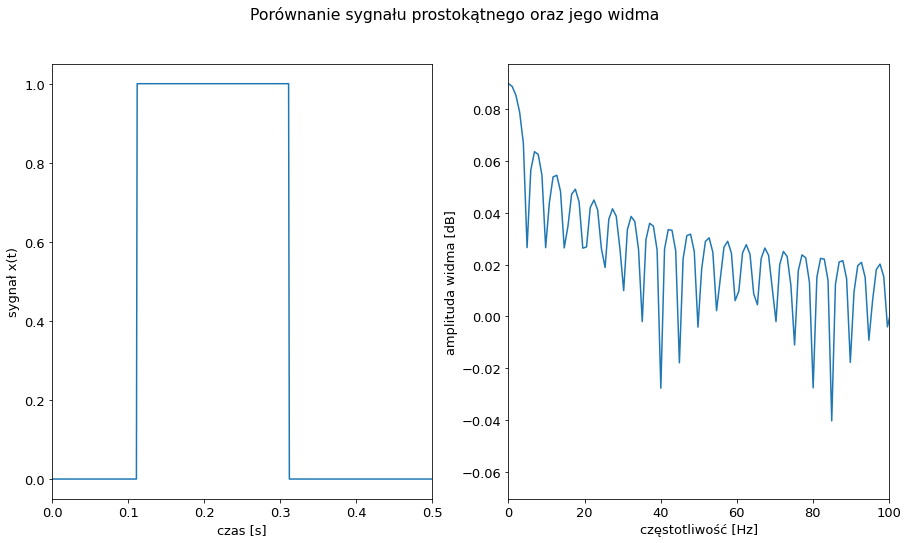

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Porównanie sygnału prostokątnego oraz jego widma ')
ax1.plot(t, rect)
ax1.set(xlabel='czas [s]', ylabel='sygnał x(t)', xlim = (0,0.5))
ax2.plot(freq, widmo)
ax2.set(xlabel='częstotliwość [Hz]', ylabel='amplituda widma [dB]', xlim = (0,100))
#ax2.set(xlabel='częstotliwość [Hz]', ylabel='amplituda widma')
plt.show()

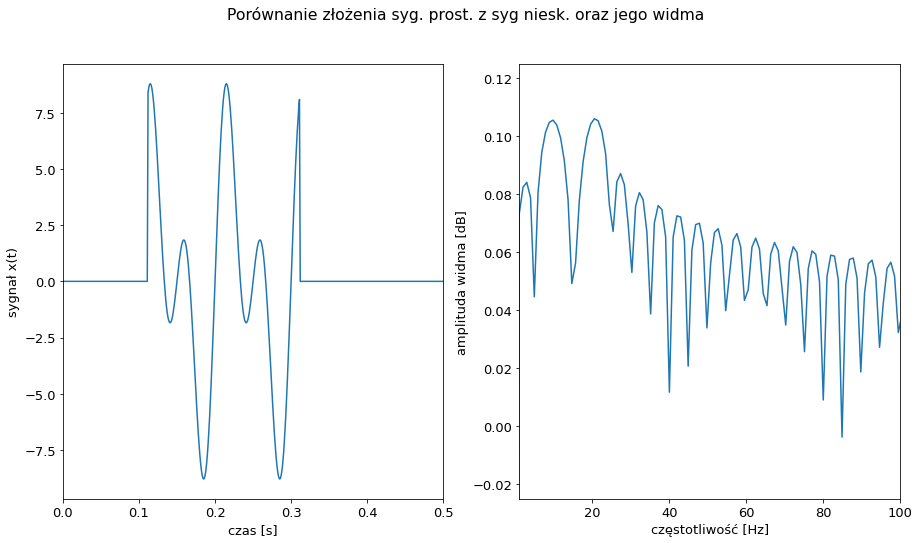

In [10]:
singal = x * rect
widmo = 20 * np.log10(np.abs(np.fft.rfft(singal))) / (N/2)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Porównanie złożenia syg. prost. z syg niesk. oraz jego widma ')
ax1.plot(t, singal)
ax1.set(xlabel='czas [s]', ylabel='sygnał x(t)', xlim = (0,0.5))
ax2.plot(freq, widmo)
ax2.set(xlabel='częstotliwość [Hz]', ylabel='amplituda widma [dB]', xlim = (1,100), ylim=(-0.025, 0.125))
#ax2.set(xlabel='częstotliwość [Hz]', ylabel='amplituda widma')
plt.show()

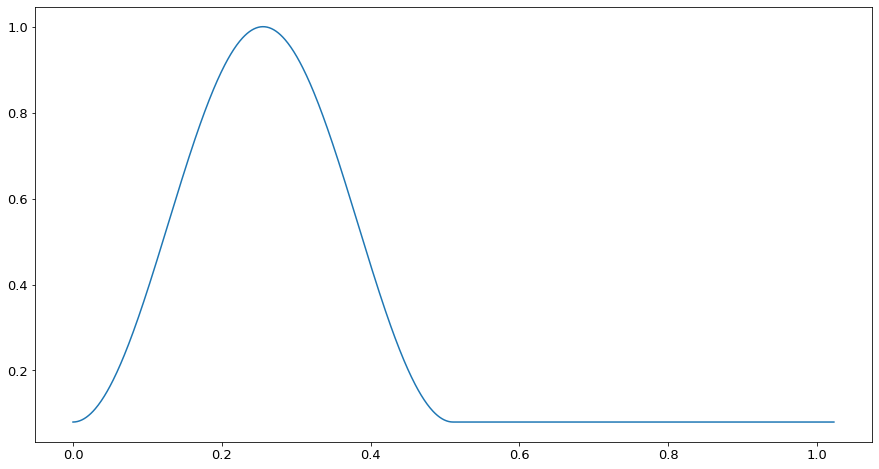

In [11]:
window = np.hamming(N/2)
hamm = np.concatenate((window, np.full(N - window.size, min(window))))
plt.plot(t, hamm) 

C:\Users\bogum\AppData\Local\Temp/ipykernel_10780/238868118.py:1: RuntimeWarning: divide by zero encountered in log10
  widmo = 20 * np.log10(np.abs(np.fft.rfft(hamm))) / (N/2)


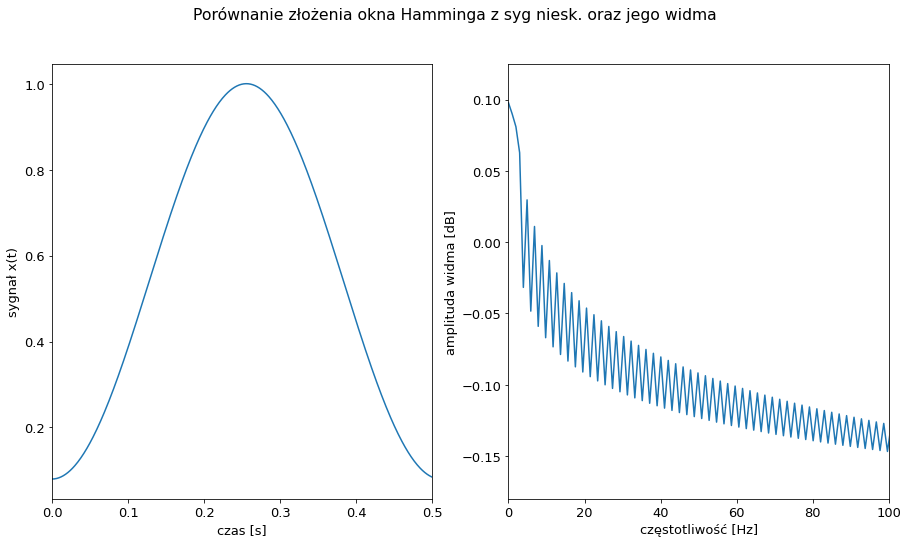

In [12]:
widmo = 20 * np.log10(np.abs(np.fft.rfft(hamm))) / (N/2)
#widmo = np.abs(np.fft.rfft(rect)) / (N/2)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Porównanie złożenia okna Hamminga z syg niesk. oraz jego widma ')
ax1.plot(t, hamm)
ax1.set(xlabel='czas [s]', ylabel='sygnał x(t)', xlim = (0,0.5))
ax2.plot(freq, widmo)
ax2.set(xlabel='częstotliwość [Hz]', ylabel='amplituda widma [dB]', xlim = (0,100), ylim=(-0.18, 0.125))
plt.show()

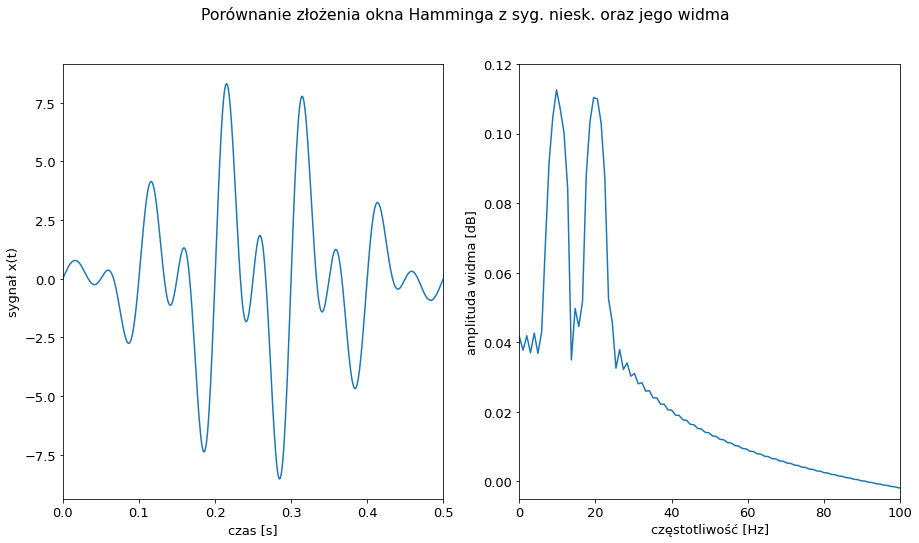

In [13]:
signal = x * hamm
widmo = 20 * np.log10(np.abs(np.fft.rfft(signal))) / (N/2)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Porównanie złożenia okna Hamminga z syg. niesk. oraz jego widma ')
ax1.plot(t, signal)
ax1.set(xlabel='czas [s]', ylabel='sygnał x(t)', xlim = (0,0.5))
ax2.plot(freq, widmo)
ax2.set(xlabel='częstotliwość [Hz]', ylabel='amplituda widma [dB]', xlim = (0,100), ylim=(-0.005, 0.12))
plt.show()

In [14]:
wav_fname = 'chord.wav'
samplerate, data = wavfile.read(wav_fname)

In [15]:
length = data.shape[0] / samplerate
N = data.shape[0]
t = np.linspace(0., length, data.shape[0])
freq = np.fft.rfftfreq(len(data), 1/samplerate)

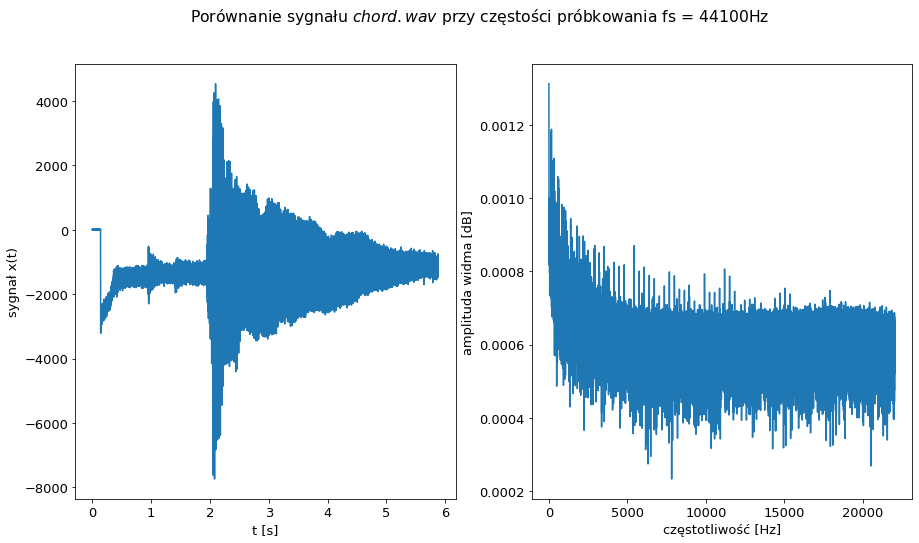

In [16]:
signal = data
widmo = 20 * np.log10(np.abs(np.fft.rfft(signal))) / (N/2)

#widmo = np.abs(np.fft.rfft(signal)) / (N/2)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Porównanie sygnału $\it{chord.wav}$ przy częstości próbkowania ' + f'fs = {samplerate}Hz')
ax1.plot(t, signal)
ax1.set(xlabel='t [s]', ylabel='sygnał x(t)')
ax2.plot(freq, widmo)
ax2.set(xlabel='częstotliwość [Hz]', ylabel='amplituda widma [dB]')
plt.show()

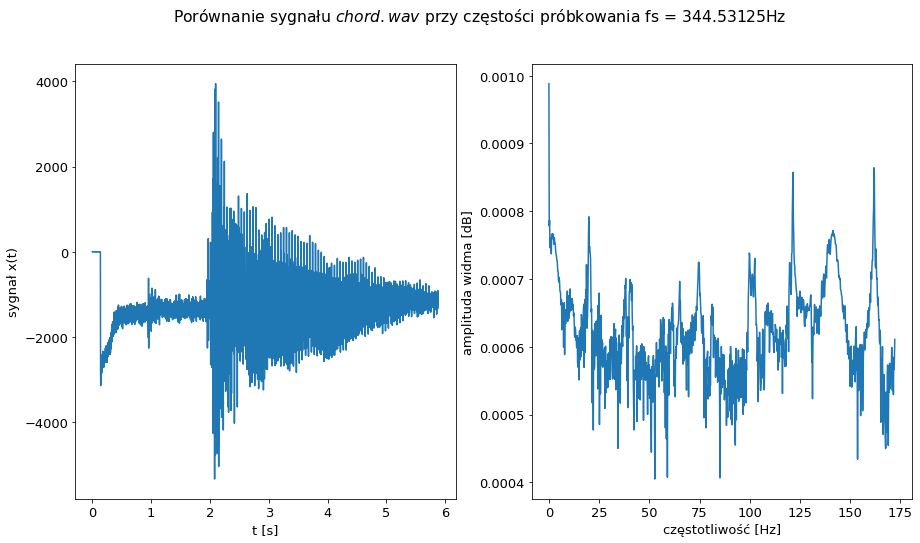

In [17]:
dec = 128
signal = data[::dec]
widmo = 20 * np.log10(np.abs(np.fft.rfft(signal))) / (N/2)
fs = samplerate/dec
freq = np.fft.rfftfreq(len(signal), 1/fs)
#widmo = np.abs(np.fft.rfft(signal)) / (N/2)
time = t[::dec]

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Porównanie sygnału $\it{chord.wav}$ przy częstości próbkowania ' + f'fs = {fs}Hz')
ax1.plot(time, signal)
ax1.set(xlabel='t [s]', ylabel='sygnał x(t)')
ax2.plot(freq, widmo)
ax2.set(xlabel='częstotliwość [Hz]', ylabel='amplituda widma [dB]')
plt.show()

In [18]:
zero_array = np.zeros(4*len(data))
signal = np.concatenate((data, zero_array))
length = signal.shape[0] / samplerate
time = np.linspace(0., length, signal.shape[0])

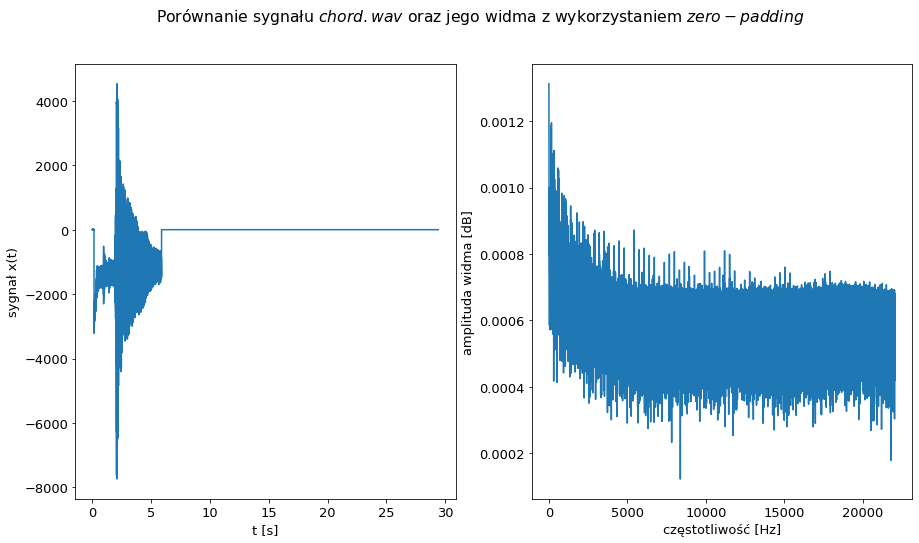

In [19]:
widmo = 20 * np.log10(np.abs(np.fft.rfft(signal))) / (N/2)
fs = samplerate
freq = np.fft.rfftfreq(len(signal), 1/fs)
#widmo = np.abs(np.fft.rfft(signal)) / (N/2)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Porównanie sygnału $\it{chord.wav}$ oraz jego widma z wykorzystaniem $\it{zero-padding}$')
ax1.plot(time, signal)
ax1.set(xlabel='t [s]', ylabel='sygnał x(t)')
ax2.plot(freq, widmo)
ax2.set(xlabel='częstotliwość [Hz]', ylabel='amplituda widma [dB]')
plt.show()

In [49]:
signal = np.zeros(2*len(data))

for index, value in enumerate(data):
    signal[index*2] = value

length = data.shape[0] / samplerate
time = np.linspace(0., length, signal.shape[0])

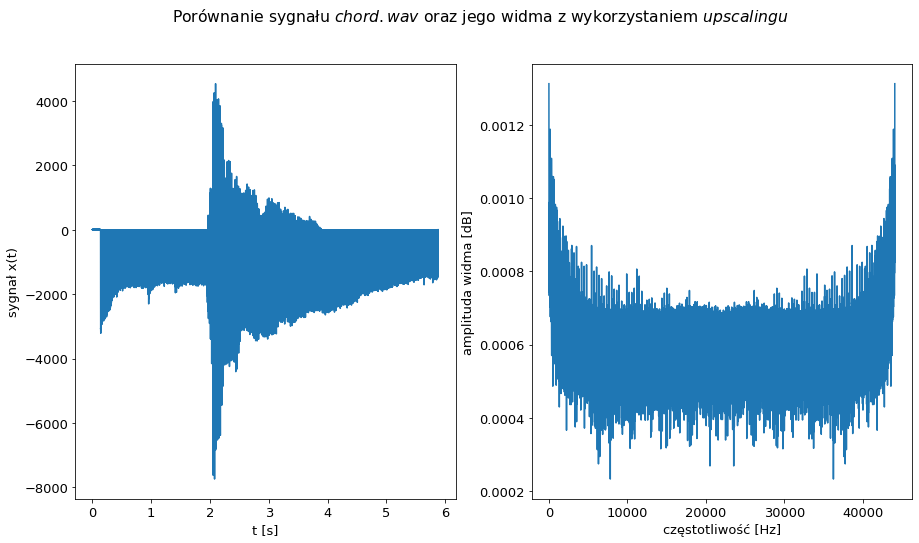

In [53]:
widmo = 20 * np.log10(np.abs(np.fft.rfft(signal))) / (N/2)
fs = samplerate * 2
freq = np.fft.rfftfreq(len(signal), 1/fs)
#widmo = np.abs(np.fft.rfft(signal)) / (N/2)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Porównanie sygnału $\it{chord.wav}$ oraz jego widma z wykorzystaniem $\it{upscalingu}$')
ax1.plot(time, signal)
ax1.set(xlabel='t [s]', ylabel='sygnał x(t)')
ax2.plot(freq, widmo)
ax2.set(xlabel='częstotliwość [Hz]', ylabel='amplituda widma [dB]')
plt.show()